# Assignment 3

#### MD ASHRAFUL HAKIM KHAN SIDDIQUEE
#### MD EASIN
#### AKLIMA BEGUM MITU

In [2]:
# Import Numpy and Pandas once for all tasks
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt # if this line gives an error, please install matplotlib with pip or conda

## Task 1 (1 point)

**Indexing 2D Arrays** 

Write a function that takes a 2D array as an argument with **at least 3 rows and 3 columns** (throw an exception, if the user provides too few dimensions). The matrix is then stripped of the 'outer' rows and columns and only the remaining inner matrix is returned. Below a visual example for a 4x5 matrix:

$$
\begin{bmatrix} 
    \cdot & \cdot & \cdot & \cdot & \cdot \\
    \cdot & O & O & O & \cdot \\
    \cdot & O & O & O & \cdot \\
    \cdot & \cdot & \cdot & \cdot & \cdot
\end{bmatrix}
$$

Test your function for the matrix below. Don't forget to write the docstrings.

In [3]:
def strip_mat(arr):
    assert arr.shape >= (3, 3)
    return arr[1: -1, 1:-1]
    

In [4]:
# When applying your function to the following matrix, the output should be as below:
arr1 = np.ones((4,5)) * np.arange(1,6) - np.arange(4).reshape((4,1)) # same matrix as in Numpy lecture
print(strip_mat(arr1))

[[1. 2. 3.]
 [0. 1. 2.]]


## Task 2 (1 point)

**Arrays of Random Variables**

Create a ``numpy`` array with 10000 rows and 2 columns. The first column should contain Gaussian distributed variables with mean 1 and standard deviation 2 and the second column should contain Gaussian distributed variables with mean -2 and standard deviation 0.5. 

In [5]:
# YOUR CODE HERE
rand_arr = np.random.randn(100000, 2) * np.array([2., 0.5]) + np.array([1,-2])

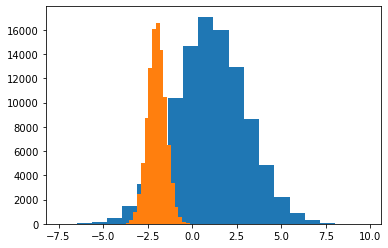

In [6]:
# When plotted as histograms, the two columns should look roughly like this:
plt.hist(rand_arr[:,0], bins = 20)
plt.hist(rand_arr[:,1], bins = 20)
plt.show()

## Task 3 (1 point)

**Polar Coordinates**

Let $P = (x, y)$ be a point in the standard 2D-space. Its cartesian coordinates can be converted into polar coordinates by applying the transformations:

$$
r = \sqrt{x^2 + y^2}
$$

for the radius $r$ and 

$$
\varphi = tan^{-1}(\frac{y}{x})
$$

for the angle $\varphi$. 

Create a random 10x2 matrix representing cartesian coordinates and convert them to polar.

In [12]:
rand_mat= np.random.random((10,2))
x,y = rand_mat[:,0], rand_mat[:,1]
r = np.sqrt(x**2+y**2)
t = np.arctan2(y,x)
print(r)
print(t)

[0.47566894 0.69816981 0.82645354 0.33073723 0.65921454 0.64374153
 1.01479415 0.84683743 0.90386864 0.15118035]
[1.49874103 0.19367707 0.7082546  1.2112911  0.00303169 1.21444693
 1.16965233 0.66220278 0.86794719 1.42963504]


## Task 4 (1 point)

**Show Me the Stats!**

Download the file *zuwendungen-berlin.csv.gz* from the Pandas lecture folder and load it into a Pandas data frame.

Now print the following statistics

- the count
- the mean
- the standard deviation
- the minimum
- the median
- the maximum
 
**only** for the spendings of the Berlin Senat (the column name in German is *Betrag*).

Your output stats should be:

```[40820.0, 229215.96496815287, 3931963.428809921, 100.0, 16477.0, 487261162.0]```

*Note*: you can inspect a couple of samples of the dataframe with ``df.sample(n=10)`` for better understanding your data.

In [7]:
df = pd.read_csv("data/zuwendungen-berlin.csv.gz")
var = df.describe()
print( [var['Betrag']['count'],
        var['Betrag']['mean'],
        var['Betrag']['std'],
        var['Betrag']['min'],
        var['Betrag']['50%'],
        var['Betrag']['max']
        ])

[40820.0, 229215.96496815287, 3931963.428809921, 100.0, 16477.0, 487261162.0]


## Task 5 (1 point)

**How much is each recipient of a spending receiving in total?**

Use the previously loaded data frame of spendings, group by recipient (column *Name*) and then sum all money received for each recipient. Print the names of the recipients that received in total **250 euros**. 

In [8]:
df = pd.read_csv("data/zuwendungen-berlin.csv.gz")

var = df.groupby( 'Name', as_index=False ).sum()
# get values where sum is total 250 Euro
print(var[ var["Betrag"] == 250 ]['Name'])

617                                   BDH Spandau e. V.
3021                                Fritz-Karsen-Schule
6210                  Rudolf Steiner Schule Berlin e.V.
6771    Sozialverband Deutschland, Landesverband Berlin
8743                                      formDDR e. V.
Name: Name, dtype: object


## Task 6 (1 point)

**How much is Berlin spending on each political ressort?**

Use the previously loaded data frame of spendings, group by political ressort (in German 'Politikbereich') and compute the 

 - minimum
 - median
 - maximum

of the spendings on each political ressort. Print the aggregates in the political ressort ('Politikbereich') 'sciences' ('Wissenschaft').

Your output stats should be 

```[500.0, 115557.5, 41852102.0]```

In [9]:
df = pd.read_csv("data/zuwendungen-berlin.csv.gz")

var = df[df["Politikbereich"] == "Wissenschaft"]
var = var.groupby('Politikbereich')
var = var.describe()
print([var['Betrag']['min']['Wissenschaft'],
       var['Betrag']['50%']['Wissenschaft'],
       var['Betrag']['max']['Wissenschaft']
       ])

[500.0, 115557.5, 41852102.0]


## Task 7 (4 points)

**How much is Berlin spending on each U-Bahn?**

At the time this dataset was created, there were 9 metro lines in Berlin.

Use the previously loaded data frame of spendings, filter for transportation (German 'Verkehr'), group by the specific Ubahn and sum up the spendings. At the end, print the Ubahn names ordered from most (first element) to least expensive (last element).

*Note*: For the Ubahn grouping you are interested in the column 'Zweck' (eng. 'purpose'). This column contains a short description of what exactly the money was spent on. The Ubahn signs - *U1, U2... U9* - are hidden in these descriptions. You need to find a way to extract these signs so that you can group according to them. Sometimes there is more than one Ubahn listed in the description; it is fine if you just extract the first one.

In [11]:
df = pd.read_csv("data/zuwendungen-berlin.csv.gz")

df['ubahn'] = df['Zweck'].str.extract('(U[1-9])', expand=False)
money_spent_per_ubahn = df.groupby('ubahn', as_index=False)\
        .agg({"Betrag": "sum"})
print(money_spent_per_ubahn.sort_values(by=['Betrag'], ascending=False)['ubahn'])

4    U5
1    U2
0    U1
5    U6
7    U8
6    U7
8    U9
2    U3
3    U4
Name: ubahn, dtype: object
